<a href="https://colab.research.google.com/github/RoyAru11/R-program/blob/main/MLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

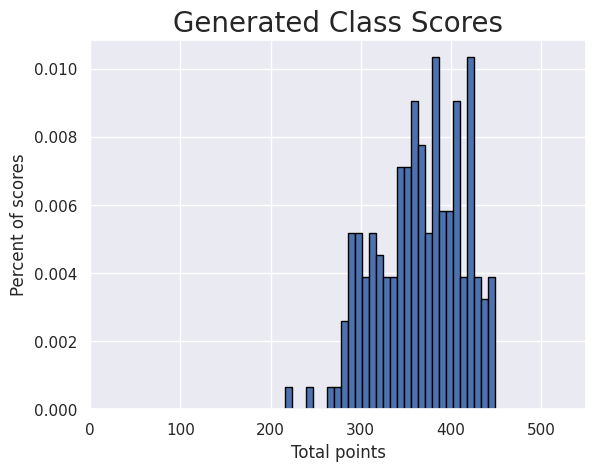

In [ ]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
sns.set()
import ipywidgets
def gen_data(mu=0, sigma=1, lower_lim=0, upper_lim=1000, n=200):
    data = np.zeros(n)
    for i in range(n):
        redo = True
        while redo:
            draw = np.random.normal(loc=mu, scale=sigma)
            if draw > lower_lim and draw < upper_lim:
                redo = False
        data[i] = draw
    return data
np.random.seed(100)
mu_true = 380
sigma_true = 55
scores_data = gen_data(mu=mu_true, sigma=sigma_true, lower_lim=0, upper_lim=450)
scores_data = pd.Series(scores_data)
# count, bins, ignored = plt.hist(scores_data, 30, edgecolor='black', normed=True)
count, bins, ignored = plt.hist(scores_data, bins=30, edgecolor='black', density=True)
plt.title('Generated Class Scores', fontsize=20)
plt.xlabel('Total points')
plt.ylabel('Percent of scores')
plt.xlim([0, 550]);  # This gives the xmin and xmax to be plotted"
# Don't set this figure until have played with the figure below

In [ ]:
def truncnorm_pdf(xvals, mu=300, sigma=100, cutoff=None):
  if cutoff == 'None':
    prob_notcut = 1.0-sts.norm.cdf(0, loc=mu, scale=sigma)
  else:
    prob_notcut = (sts.norm.cdf(cutoff, loc=mu, scale=sigma) -
                 sts.norm.cdf(-cutoff, loc=mu, scale=sigma))
  pdf_vals = ((1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (xvals - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
  return pdf_vals


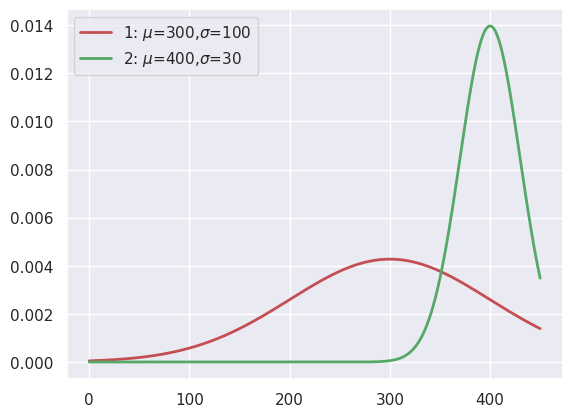

In [ ]:
scores_grid = np.linspace(0, 450, 500)
mu_1 = 300
sig_1 = 100
plt.plot(scores_grid, truncnorm_pdf(scores_grid, mu_1, sig_1, cutoff=450),
         linewidth=2, color='r', label='1: $\mu$=300,$\sigma$=100')
plt.legend(loc='upper left')

mu_2 = 400
sig_2 = 30
plt.plot(scores_grid, truncnorm_pdf(scores_grid, mu_2, sig_2, cutoff=450),
         linewidth=2, color='g', label='2: $\mu$=400,$\sigma$=30')
plt.legend(loc='upper left')


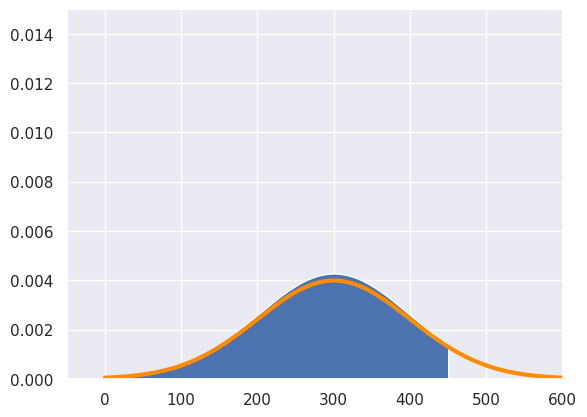

In [ ]:
def f(mu = 300, sigma=100, truncation = 450):
    mu_1 = mu
    sig_1 = sigma
    fig, ax = plt.subplots()
    scores_grid = np.linspace(0, truncation, 100)
    X = scores_grid
    Y = truncnorm_pdf(scores_grid, mu_1, sig_1, truncation)
#     plt.plot(X, Y, linewidth=2)
    plt.xlim(-50,600)
    plt.ylim(0,0.015)
    ax.fill_between(X, Y)
    X_notruncation = np.linspace(0,600,100)
    Y_notruncation = sts.norm.pdf(X_notruncation, loc=mu, scale=sigma)
    plt.plot(X_notruncation, Y_notruncation, color='#FF8C00', linewidth='3')
f()

In [ ]:
ipywidgets.interact(f, truncation=(10,700))


interactive(children=(IntSlider(value=300, description='mu', max=900, min=-300), IntSlider(value=100, descript…

<function __main__.f(mu=300, sigma=100, truncation=450)>

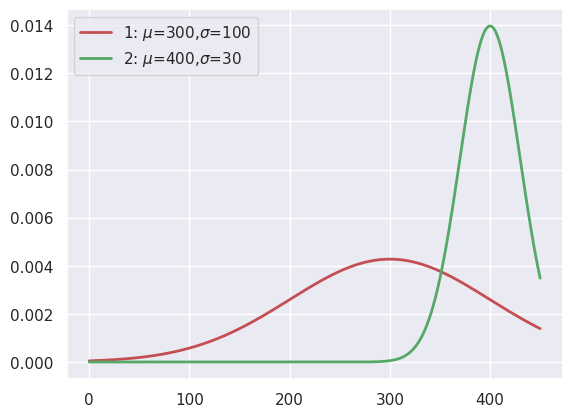

In [ ]:
scores_grid = np.linspace(0, 450, 500)
mu_1 = 300
sig_1 = 100
plt.plot(scores_grid, truncnorm_pdf(scores_grid, mu_1, sig_1, cutoff=450),
         linewidth=2, color='r', label='1: $\mu$=300,$\sigma$=100')
plt.legend(loc='upper left')

mu_2 = 400
sig_2 = 30
plt.plot(scores_grid, truncnorm_pdf(scores_grid, mu_2, sig_2, cutoff=450),
         linewidth=2, color='g', label='2: $\mu$=400,$\sigma$=30')
plt.legend(loc='upper left')

In [ ]:
def log_lik_truncnorm(xvals, mu, sigma, cutoff):
  pdf_vals = truncnorm_pdf(xvals, mu, sigma, cutoff)
  ln_pdf_vals = np.log(pdf_vals)
  log_lik_val = ln_pdf_vals.sum()
  return log_lik_val
print('Log-likelihood 1: ', log_lik_truncnorm(scores_data, mu_1, sig_1, 450))
print('Log-likelihood 2: ', log_lik_truncnorm(scores_data, mu_2, sig_2, 450))

Log-likelihood 1:  -1155.927271021299
Log-likelihood 2:  -1230.8944596709596


***Maximization or Minization problem***

In [ ]:
a = (1,2)
b = 3
c = (4,5)
numbers = [a, b, c]
numbers
[*a, b, *c]
def f(*args, **kwargs):
    return args
def g(args):
    return args
f(1,2,3)

(1, 2, 3)

In [ ]:
def crit(params, *args):
    mu, sigma = params
    xvals, cutoff = args
    log_lik_val = log_lik_truncnorm(xvals, mu, sigma, cutoff)
    neg_log_lik_val = -log_lik_val

    return neg_log_lik_val

In [ ]:
def nll_print(mu=100.0, sigma=100.0):
    params = np.array([mu, sigma])
    xvals = scores_data
    cutoff = 450.0
    neg_log_lik_val = crit(params, xvals, cutoff)
    print('Negative Log-Likelihood: ', neg_log_lik_val)

In [ ]:
nll_print()

Negative Log-Likelihood:  1831.7788321130754


In [ ]:
ipywidgets.interact(nll_print, mu=(1,1000), sigma=(1,1000));



interactive(children=(IntSlider(value=100, description='mu', max=1000, min=1), IntSlider(value=100, descriptio…

In [ ]:
def vis_MLE(mu=380, sigma=55):
    # Plot the histogram of the data
    count, bins, ignored = plt.hist(scores_data, 30, edgecolor='black', density=True)
    plt.title('Econ 381 scores: 2011-2012', fontsize=20)
    plt.xlabel('Total points')
    plt.ylabel('Percent of scores')


    # Plot the two test distributions from before
    plt.plot(scores_grid, truncnorm_pdf(scores_grid, mu_1, sig_1, 450),
             linewidth=2, color='r', label='1: $\mu$=300,$\sigma$=30')
    plt.legend(loc='upper left')

    plt.plot(scores_grid, truncnorm_pdf(scores_grid, mu_2, sig_2, 450),
             linewidth=2, color='g', label='2: $\mu$=400,$\sigma$=70')
    plt.legend(loc='upper left')

    # Plot the MLE estimated distribution
    plt.plot(scores_grid, truncnorm_pdf(scores_grid, mu, sigma, 450),
             linewidth=2, color='k', label='3: Custom')
    plt.legend(loc='upper left')
    plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"
    plt.ylim([0,0.03])

In [ ]:
ipywidgets.interact(vis_MLE, sigma=(1,300))

interactive(children=(IntSlider(value=380, description='mu', max=1140, min=-380), IntSlider(value=55, descript…

<function __main__.vis_MLE(mu=380, sigma=55)>